<a href="https://colab.research.google.com/github/movie112/INU-DILAB/blob/main/dacon/dacon101/DACON_101_lv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DACON_101: 머신러닝이 처음이라면 🤔   
🏃‍♀️ [데이터 다운로드] 부터 ️[대회 제출] 까지 🏃‍♂
## Lv3. 교차검증과 LGBM 모델을 활용한 와인 품질 분류하기
---
### - EDA -
#### EDA 1/6 read_csv(), info(), shape, head()
- EDA의 첫 번째 순서로 가장 기본적인 데이터 불러오기, 데이터 정보 관측하기, 데이터 크기 파악하기, 데이터 피쳐 알아보기 진행
- csv 파일을 Pandas DataFrame class로 불러오기 위해 read_csv() 매서드를 활용

In [ ]:
df = pd.read_csv(‘경로')

- info() 매서드: 데이터의 피쳐수와 컬럼명, 결측치여부, Dtype 에 대한 정보를 알아냄

In [ ]:
df.info()

- shape 속성: 데이터의 행갯수, 열갯수를 출력해 데이터의 크기 파악

In [ ]:
df.shape

- head() 매서드: 데이터의 대략적인 정보 파악



In [ ]:
df.head()

#### EDA 2/6 결측치 유무 확인하기 isnull().sum()
- EDA 과정에서 우선적으로 결측치의 유무에 대해서 반드시 파악 필요, 결측치가 없다면 다음과정으로 넘어가도 되지만, 존재한다면 이에 대한 조치 취함

In [ ]:
	df.isnull().sum()

#### EDA 3/6 수치데이터 특성보기 (describe())
- describe() 매서드: 
  - 다양한 통계량을 요약, DataFrame의 각 열에 대해 요약 수행
  - 결측치는 제외하고 수치형 데이터에 한함
  - 기본적으로 count, mean, std, min , 1 분위수, 2 분위수, 3 분위수, max 값이 출력


In [ ]:
df.describe()

#### EDA 4/6 변수분포 시각화
- 예측하고자 하는 변수인 종속변수(quality) 의 분포를 시각화하겠다.
- matplotlib, seaborn 라이브러리로 시각화를 출력 가능, 시각화 결과를 통해 머신러닝 방향성을 잡을 수 있다.

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

- 시각화를 진행할 때, 보통 copy()매서드로 복사본을 생성한 후 진행

In [ ]:
dfcopy = df.copy()

- seaborn 의 distplot() 매서드를 이용

In [ ]:
sns.distplot(df['피쳐명'], kde=True, bins=None)
df['피쳐명'] # 출력하고자 하는 컬럼
kde          #'그래프에 선을 출력할지 여부'
bins         #'출력할 막대그래프 갯수'

- matplotlib 의 axis()매서드로 그래프 축의 최솟값, 최댓값 지정
- matplotlib 의 title() 매서드로 그래프의 제목을 지정
- matplotlib 의 show() 매서드로 그래프를 출력

In [ ]:
plt.axis(['x 축 최솟값, x 축 최댓값, y 축 최솟값, y 축 최댓값'])
plt.title('제목')
plt.show()

#### EDA 5/6 Matplotlib 선 그래프 그리기 (plot())
- Matplotlib: 데이터 시각화 라이브러리
- 라이브러리를 불러오고 plot() 매서드를 활용해서 선 그래프를 그려보자

In [ ]:
from matplotlib import pyplot as plt
plt.plot(x, y)
plt.show()

#### EDA 6/6 Matplotlib 히스토그램 그리기 (hist())
- 히스토그램(Histogram): 도수분포표를 그래프로 나타낸 것

In [ ]:
from matplotlib.pyplot as plt
plt.hist(x, y)
plt.show()

---
### - 전처리 -
#### 전처리 1/4 이상치탐지
- 이상치(Outlier)
  - 이상(문제)이 있는 데이터, 일반적인 데이터 패턴과 매우 다른 패턴을 갖는 데이터
  - 모델의 성능을 크게 하락시킴
- 대표적인 방법은 IQR(Inter Qunatile Range)로, 사분위 값의 편차를 이용,이를 boxplot 그래프로 볼 수 있음


In [ ]:
import seaborn as sns
sns.boxplot(data=train['fixed acidity'])

#### 전처리 2/4 이상치 제거
- IQR: 3분위수(75%에 위치한 값) - 1분위수(25%에 위치한 값)
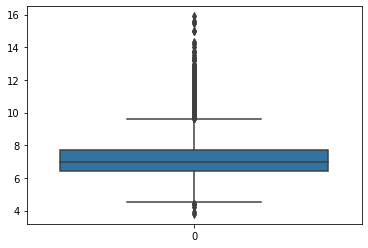</img>
  - 10~8 사이의 실선 : 3분위수 + 1.5 * IQR
  - 보라색 박스의 위쪽 실선 : 3분위수 (75%)
  - 보라색 박스의 중앙 실선 : 2분위수 (중앙값)
  - 보라색 박스의 아래 실선 : 1분위수 (25%)
  - 4~6 사이의 실선 : 1분위수 - 1.5 * IQR
  - 보라색 박스의 길이 : 3분위수 - 1분위수 = IQR
- 즉, 우리는 이 boxplot의 4와 6사이의 실선보다 작고, 8과 10 사이의 실선보다 큰 데이터 포인트들을 이상치로 판단하고 제거해보겠다.


In [ ]:
# 25%에 위치한 값
quantile_25 = np.quantile(train['fixed acidity'], 0.25)
# 75%에 위치한 값
quantile_75 = np.quantile(train['fixed acidity'],0.75)
# IQR
IQR = quantile_75 - quantile_25
# quantile_25보다 1.5 * IQR 작은 값
minimum = quantile_25 - 1.5 * IQR
# quantile_75보다 1.5 * IQR 큰 값
maximum = quantile_75 + 1.5 * IQR

# minimum보다 크거나 같고, maximum보다 작거나 같은 값들만 뽑아낸다
train2 = train[(minimum <= train['fixed acidity']) & (train['fixed acidity'] <= maximum)]

#### 전처리 3/4 수치형 데이터 정규화
- 의사결정나무나, 랜덤포레스트 같은“트리 기반의 모델"은 대소 비교를 통해서 구분해서 숫자의 단위에 크게 영향을 받지 않음
-  Logistic Regression, Lasso 등과 같은“평활 함수 모델"들은 숫자의 크기와 단위에 영향 많이 받음
- __수치형 데이터 정규화__로모든 모델에 잘 어울리는 데이터 생성
  -  "Min Max Scailing"기법
    - 상당히 간단
    - 가장 작은 값은 0으로, 가장 큰 값은 1로 만들어주는 방법, 그 사이의 값들은 비율에 따라서 0~1 사이에 분포
    - 이상치에 민감: 상대적으로 굉장히 큰 값이나, 작은 값을 1이나 0으로 만들기 때문에 문제 발생

In [ ]:
# describe를 통해 "fixed acidity"의 데이터의 분포가 어떻게 생겼는지 짐작
train.describe()

# seaborn의 displot을 통해 "fixed acidity"의 distplot을 그림
sns.distplot(train['fixed acidity'])

# MinMaxScaler를 "scaler"라는 변수에 지정
scaler = MinMaxScaler()

# "scaler" 학습
scaler.fit(train[['fixed acidity']])

# "scaler"를 통해 train의 "fixed acidity"를 바꾸어 "Scaled fixed acidity"라는 column에 저장
train['Scaled fixed acidity'] = scaler.transform(train[['fixed acidity']])

# seaborn의 displot을 통해 "Scaled fixed acidity"의 distplot을 그림
sns.distplot(train['Scaled fixed acidity'])

#### 전처리 4/4 원-핫 인코딩(One-Hot Encoding)
- 컴퓨터는 '문자' 데이터를 학습할 수 없어서 'type'같은 feature는 컴퓨터가 읽어서 학습할 수 있도록 'encoding'을 해줘야 함
- One-Hot Encoding:‘하나만 Hot 하고, 나머지는 Cold한 데이터', 즉, 자신에게 맞는 것은 1로, 나머지는 0으로 바꾸어 준다.
  - example) “출신 지역" 변수는 문자로 되어있어 컴퓨터가 이해할 수 없다. 숫자로 변경이 필요

  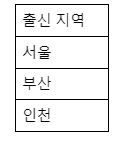</img>
  ➜
  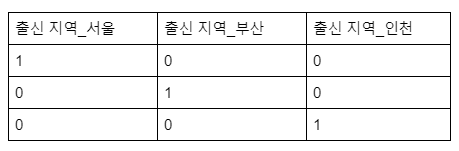</img>